when you have more then 2 classes as an option, its called multi class classification.
for example: n different classes where n > 2. 

To practise multi-class classification, we are going to build a neural network to classify images of different item of clothing.

In [1]:
#import required libarires. 

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset

from tensorflow.keras.datasets import fashion_mnist

In [3]:
#the data have already been stored into training and test sets for us.

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#show the first training example.

print(f"Training sample :\n {train_data[0]}\n")
print(f"Training label :\n {train_labels[0]}\n")

Training sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [5]:
#check the shape of our data.
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
#check the shape of the single example.

train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

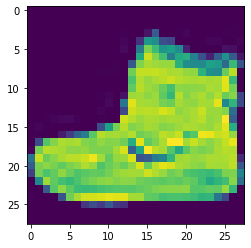

In [7]:
#plot a single sample.

plt.imshow(train_data[0])

In [8]:
train_labels[0]

9

Its looks like our labels are in numerical form. It is good for neural network but let's make it in human readable form. 

In [9]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
len(class_names)

10

Text(0.5, 1.0, 'Pullover')

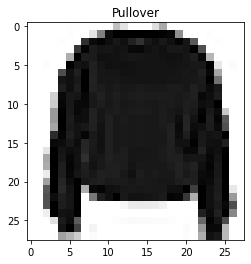

In [11]:
#plot an example image and its label.

index_of_choice = 7
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

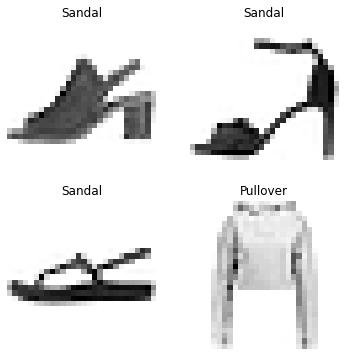

In [12]:
#plot multiple random images of fashion Mnist.

import random
plt.figure(figsize = (6, 6))

for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

#Building a MultiClass Classification model.

for our multiclass classfication model, we can use similar architecture to our binary classification, however we have to tweak a few things.

Inputshape = the shape of one image. train_data[0].shpae. i.e. 28 x 28.

Outputshape = 10(one per class of clothing). We have 10 different labels.

outputlayer activation = softmax(not sigmoid)

Loss function - If your labels are One_hot encoded, use CategoricalCrossentropy().

If your labels are integer use SparseCategoricalCrossentropy() or Onehot encode the labels and then use CategoricalCrossentropy.


In [13]:
#set random seed.

tf.random.set_seed(42)

#build a model.

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28, 28)), 
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax")
])

#we had to reshape 28x28 to 784, the Flatten layer does this for us.

In [14]:
#compile the model.

model_1.compile(loss = "CategoricalCrossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [15]:
train_labels[:10], test_labels[:10]

(array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [16]:
#fit the model.

history_1 = model_1.fit(x = train_data,
                        y = tf.one_hot(train_labels, depth = 10),
                        validation_data = (test_data, tf.one_hot(test_labels, depth = 10)),
                        epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy

The above model_1 is giving an accuracy of ~35% for the orginal data. But the neural network perfers the normalized data. We can normalize our data through (scaling or normalization technique).

In [17]:
#check the min and max values of train data.

train_data.min(), train_data.max()

(0, 255)

As we can see in above cell that our data have values from 0 t0 255. We need to normalize our data and bring them between 0 and 1. 

In [18]:
## Divide train and test images by the maximum value (normalize it)

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [19]:
# Check the min and max values of the normalized data

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

Our data is between 0 and 1. lets see what happens when train model using normalized data.

In [20]:
#set random_seed.

tf.random.set_seed(42)

#create model.

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

In [21]:
#compile the model.

model_2.compile(loss = "SparseCategoricalCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [22]:
#fit the model.

history_2 = model_2.fit(x = train_data_norm,
                        y = train_labels,
                        validation_data = (test_data_norm, test_labels),
                        epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

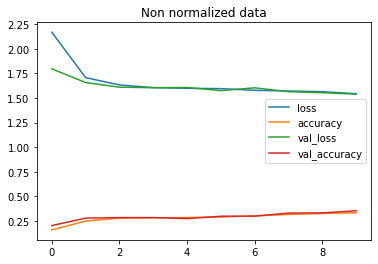

In [23]:
#We can see our model have daramatically improved when being trained with normalized data.
#lets plot the loss curve of model with un normalized data and normalized data.

#loss curve of non normalized data.
pd.DataFrame(history_1.history).plot(title = "Non normalized data")

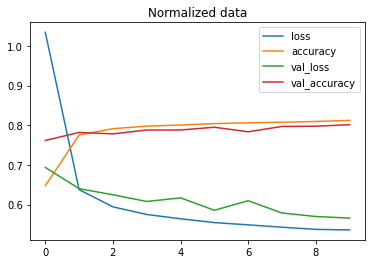

In [24]:
#loss curve of normalized data
pd.DataFrame(history_2.history).plot(title = "Normalized data")

In [25]:
#let's find the ideal learning rate.

#set random seed.

tf.random.set_seed(42)

#Build model.

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28, 28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax")
])

In [26]:
#compile the model.

model_3.compile(loss = "SparseCategoricalCrossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [27]:
#creating the learning rate callback.

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

In [28]:
#fit the model.

history_lr = model_3.fit(x = train_data_norm,
                         y = train_labels,
                         validation_data = (test_data_norm, test_labels),
                         callbacks = [lr_scheduler],
                         epochs = 40)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

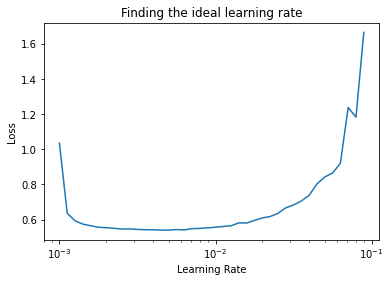

In [29]:
#plot the learning rate decay curve.

lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs, history_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [30]:
#lets create the model with ideal learning rate =  0.001

#set random seed.

tf.random.set_seed(42)

#create model_4

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28, 28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax")
])

In [31]:
#compile the model.

model_4.compile(loss = "SparseCategoricalCrossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
#fit the model.

history_4 = model_4.fit(x = train_data_norm,
                        y = train_labels,
                        validation_data = (test_data_norm, test_labels),
                        epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

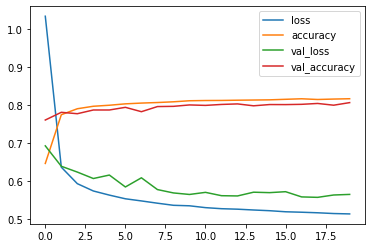

In [33]:
#plot loss curve.

pd.DataFrame(history_4.history).plot()

Now we have got a model trained with a close to ideal learning rate and performing pretty well, we have got a couple of options.
we could:

1. Evaluate its performance using other classification metrics(such as confusion matrix or classification report).

2. Asses some of its predictions through visualization.

3. Improve its accuracy by training it for longer or changing the architecture.

4. Save and export it for use in an application.

For now, we are going to look into first 2 points.

In [50]:
#create confusion matrix to visualize its prediction.

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10),
                          text_size = 15):
    #create confusion matrix.
    cm = confusion_matrix(y_true, y_pred)
    #normalize confusion matrix
    cm_norm = cm.astype(float)/cm.sum(axis = 1)[:, np.newaxis]

    n_classes = cm.shape[0]

    #plot the figure and make it pretty.
    fig, ax = plt.subplots(figsize = figsize)
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    #Are there list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #label the axes.
    ax.set(title = "confusion matrix",
        xlabel = "predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    #make x-axis label appear on the bottom.
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #set the threshold for different colors.
    threshold = (cm.max() + cm.min()) / 2

    #plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i, j] > threshold else "black",
                size = text_size)

In [36]:
#make predictions with the most recent model.

y_probs = model_4.predict(test_data_norm)

In [38]:
y_probs[0]

array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
       5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
       4.0605278e-03, 8.0787367e-01], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method

In [39]:
## See the predicted class number and label for the first example
y_probs[0].argmax()

9

In [40]:
class_names[y_probs[0].argmax()]

'Ankle boot'

In [41]:
# Convert all of the predictions from probabilities to labels
y_pred = y_probs.argmax(axis = 1)

In [42]:
y_pred[0]

9

In [43]:
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [45]:
test_labels[:4]

array([9, 2, 1, 1], dtype=uint8)

In [44]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_pred)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

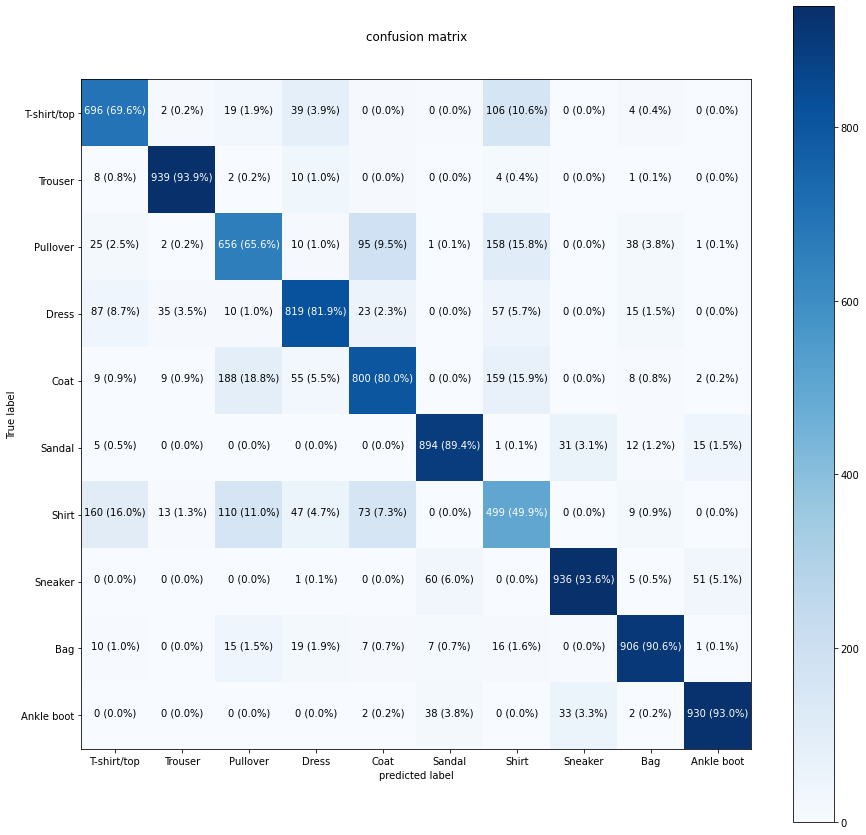

In [51]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_pred,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

It's look like our model is getting confused between shirt, tshirt/top and pull over.

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [76]:
#create a function for plotting random image along with its prediction.

import random
def plot_random_image(model, images, true_labels, classes):
    #setup random integer
    i = random.randint(0, len(test_data_norm))

    #create predictions and target.

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[test_labels[i]]

    #plot the target image.
    plt.imshow(target_image, cmap = plt.cm.binary)

    #change the color of the titles depending on if the predictions is right or wrong.
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    #Add xlabel information.
    plt.xlabel("pred:{} {:2.0f}% (True:{})".format(pred_label, 
                                                100*tf.reduce_max(pred_probs), 
                                                true_label), color = color)

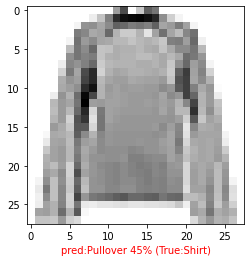

In [93]:
plot_random_image(model_4, test_data_norm, test_labels, class_names)